<a href="https://colab.research.google.com/github/shivampip/Journey2AI/blob/master/DiffSeriesPredictionWithRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def fibo(n, db={}):
    if(n<=1):
        db[n]= 1
        return 1,db
    if(n in db):
        return db[n],db
    a, db= fibo(n-2, db)
    b, db= fibo(n-1, db)     
    db[n]= a+b
    return db[n], db

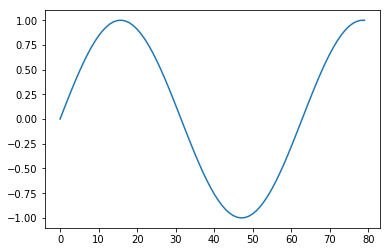

In [286]:
n= 100
#data= list(fibo(n)[1].values())
#data= range(25)
#data= [np.sin(a/10) for a in range(180)]
#data= [(a**2 + a) for a in range(200)]
#data= [-2*a for a in range(200)]
data= [np.sin(a/10) for a in range(80)]
data= np.array(data)
data= np.reshape(data,(len(data), 1))
plt.plot(data)

In [287]:
data.shape

(80, 1)

In [0]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
np.random.seed(42)

In [0]:
data= data.astype(np.float32)

In [290]:
scaler= MinMaxScaler(feature_range=(0,1))
data= scaler.fit_transform(data)
data.shape

(80, 1)

In [291]:
train_size= int(len(data)*0.67)
test_size= len(data)- train_size
X_train, X_test= data[:train_size, :], data[train_size:, :]
print(X_train.shape)
print(X_test.shape)

(53, 1)
(27, 1)


In [0]:
#  Dataset creation
def create_dataset(dataset, look_back= 1):
    dataX, dataY= [], []
    for i in range(len(dataset)- look_back - 1):
        a= dataset[i: (i+look_back), 0]
        dataX.append(a)
        b= dataset[(i+ look_back): (i+ look_back+ 1), 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [0]:
look_back= 1
X_train, y_train= create_dataset(X_train, look_back)
X_test, y_test= create_dataset(X_test, look_back)

In [0]:
X_train= np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test= np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [295]:
# LSTM model creation
model= keras.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(1, look_back)))
model.add(keras.layers.Dense(1))

model.compile(loss= 'mean_squared_error', optimizer= 'adam')

model.fit(X_train, y_train, epochs= 100, batch_size= 1, verbose= 2)

Epoch 1/100
51/51 - 2s - loss: 0.2837
Epoch 2/100
51/51 - 0s - loss: 0.1929
Epoch 3/100
51/51 - 0s - loss: 0.1304
Epoch 4/100
51/51 - 0s - loss: 0.0883
Epoch 5/100
51/51 - 0s - loss: 0.0648
Epoch 6/100
51/51 - 0s - loss: 0.0502
Epoch 7/100
51/51 - 0s - loss: 0.0422
Epoch 8/100
51/51 - 0s - loss: 0.0371
Epoch 9/100
51/51 - 0s - loss: 0.0336
Epoch 10/100
51/51 - 0s - loss: 0.0302
Epoch 11/100
51/51 - 0s - loss: 0.0271
Epoch 12/100
51/51 - 0s - loss: 0.0242
Epoch 13/100
51/51 - 0s - loss: 0.0215
Epoch 14/100
51/51 - 0s - loss: 0.0189
Epoch 15/100
51/51 - 0s - loss: 0.0166
Epoch 16/100
51/51 - 0s - loss: 0.0143
Epoch 17/100
51/51 - 0s - loss: 0.0122
Epoch 18/100
51/51 - 0s - loss: 0.0104
Epoch 19/100
51/51 - 0s - loss: 0.0087
Epoch 20/100
51/51 - 0s - loss: 0.0073
Epoch 21/100
51/51 - 0s - loss: 0.0061
Epoch 22/100
51/51 - 0s - loss: 0.0050
Epoch 23/100
51/51 - 0s - loss: 0.0042
Epoch 24/100
51/51 - 0s - loss: 0.0035
Epoch 25/100
51/51 - 0s - loss: 0.0029
Epoch 26/100
51/51 - 0s - loss: 0.

In [296]:
# Make Prediction
train_p= model.predict(X_train)
test_p= model.predict(X_test)

train_p= scaler.inverse_transform(train_p)
y_train= scaler.inverse_transform(y_train)
test_p= scaler.inverse_transform(test_p)
y_test= scaler.inverse_transform(y_test)

train_score= mean_squared_error(y_train[:,0], train_p[:,0])
test_score= mean_squared_error(y_test[:,0], test_p[:,0])
print("Train score :{:.2f}".format(train_score))
print("Test score :{:.2f}".format(test_score))


Train score :0.00
Test score :0.01


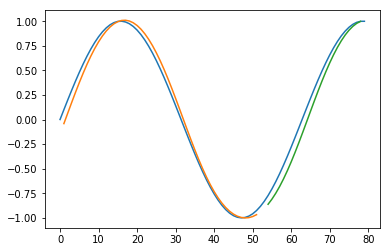

In [297]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_p)+look_back, :] = train_p
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_p)+(look_back*2)+1:len(data)-1, :] = test_p
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### DONE